In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
f_name = 'vgg16.csv'
col_names = ['model','model_alloc_size', 'model_rsv_size', 'batch_size', 'input_shape', 
             'max_alloc_mem', 'max_rsv_mem', 'transform_time', 'inference_time', 'energy', 'device_name']


data = pd.read_csv(f_name, names=col_names)
data.dropna(inplace=True)
data

,model,model_alloc_size,model_rsv_size,batch_size,input_shape,max_alloc_mem,max_rsv_mem,transform_time,inference_time,energy,device_name
0,/FYP/Edge_Profiler/models/vgg16_pruned_052.pt,532204032,541065216,1,"(224, 224)",561747968,610271232,76.172653,414.518585,0.000379,NVIDIA Tegra X1
1,/FYP/Edge_Profiler/models/vgg16_pruned_052.pt,532204032,541065216,8,"(224, 224)",736521216,765460480,97.230103,2377.679932,0.000528,NVIDIA Tegra X1
2,/FYP/Edge_Profiler/models/vgg16_pruned_052.pt,532204032,541065216,16,"(224, 224)",1210829312,1681915904,190.659424,2842.834961,0.001009,NVIDIA Tegra X1
3,/FYP/Edge_Profiler/models/vgg16_pruned_052.pt,532204032,541065216,32,"(192, 192)",1530606592,2202009600,228.700058,21350.988280,0.002009,NVIDIA Tegra X1
4,/FYP/Edge_Profiler/models/vgg16.pt,554741760,559939584,1,"(224, 224)",586801152,618659840,275.848022,492.125671,0.000521,NVIDIA Tegra X1
5,/FYP/Edge_Profiler/models/vgg16.pt,554741760,559939584,8,"(224, 224)",765490688,788529152,195.899323,2538.567139,0.000574,NVIDIA Tegra X1
6,/FYP/Edge_Profiler/models/vgg16.pt,554741760,559939584,16,"(224, 224)",1254338560,1736441856,266.886566,3951.378906,0.001169,NVIDIA Tegra X1
7,/FYP/Edge_Profiler/models/vgg16.pt,554741760,559939584,32,"(192, 192)",1582767104,2275409920,378.373077,41952.093800,0.004392,NVIDIA Tegra X1
8,/FYP/Edge_Profiler/models/vgg16.pt,554741760,559939584,64,"(160, 160)",1981815808,1992294400,379.601135,51416.457030,0.002647,NVIDIA Tegra X1
9,/FYP/Edge_Profiler/models/vgg16_pruned_052.pt,532204032,541065216,64,"(160, 160)",1917203456,1931476992,359.844940,21802.275390,0.001795,NVIDIA Tegra X1


In [29]:
# batch_input_size = [
 
#  '1 (224, 224)',
#  '8 (224, 224)',
#     '16 (224, 224)',
#  '32 (224, 224)',
#  '64 (224, 224)',
# '128 (224, 224)']


batch_input_size = [
    '1 (224, 224)',
    '8 (224, 224)',
    '16 (224, 224)',
    '32 (192, 192)',
    '64 (160, 160)',
    
]

# batch_input_size
# batch_input_size = list(set(data['batch_size'].astype(str) + ' ' + data['input_shape'].astype(str)))
batch_input_size

['1 (224, 224)',
 '8 (224, 224)',
 '16 (224, 224)',
 '32 (192, 192)',
 '64 (160, 160)']

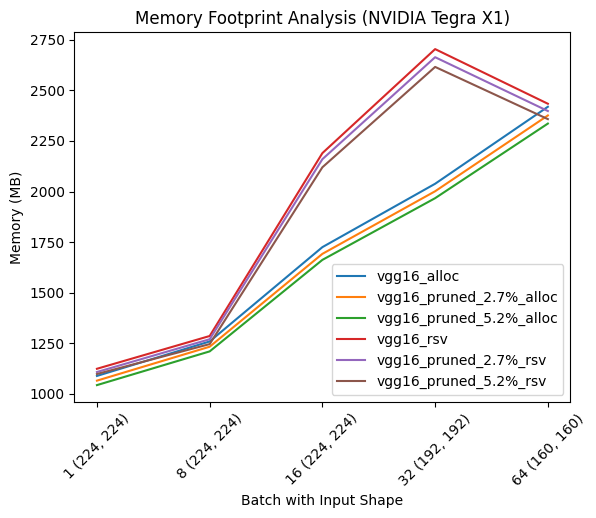

In [30]:
dev_name = data['device_name'].unique().item()
prefix = 'vgg16'

unpruned_data = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}.pt']
pruned_data_1 = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}_pruned_027.pt']
pruned_data_2 = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}_pruned_052.pt']


# batch_input_size = list(set(data['batch_size'].astype(str) + ' ' + data['input_shape'].astype(str)))

plt.plot(batch_input_size, round((unpruned_data['max_alloc_mem']+ unpruned_data['model_alloc_size'])/ 1024**2, 2), 
         label=f'{prefix}_alloc')
plt.plot(batch_input_size, round((pruned_data_1['max_alloc_mem']+ pruned_data_1['model_alloc_size'])/ 1024**2, 2), 
         label=f'{prefix}_pruned_2.7%_alloc')
plt.plot(batch_input_size, round((pruned_data_2['max_alloc_mem']+ pruned_data_2['model_alloc_size'])/ 1024**2, 2), 
         label=f'{prefix}_pruned_5.2%_alloc')

plt.plot(batch_input_size, round((unpruned_data['max_rsv_mem'] + unpruned_data['model_rsv_size'])/ 1024**2, 2), 
         label=f'{prefix}_rsv')
plt.plot(batch_input_size, round((pruned_data_1['max_rsv_mem'] + pruned_data_1['model_rsv_size'])/ 1024**2, 2), 
         label=f'{prefix}_pruned_2.7%_rsv')
plt.plot(batch_input_size, round((pruned_data_2['max_rsv_mem'] + pruned_data_2['model_rsv_size'])/ 1024**2, 2), 
         label=f'{prefix}_pruned_5.2%_rsv')


# Adding labels and title
plt.xlabel('Batch with Input Shape')
plt.ylabel('Memory (MB)')
plt.title(f'Memory Footprint Analysis ({dev_name})')

# Adding legend
plt.legend()
plt.xticks(rotation=45) 
# Display plot
plt.show()

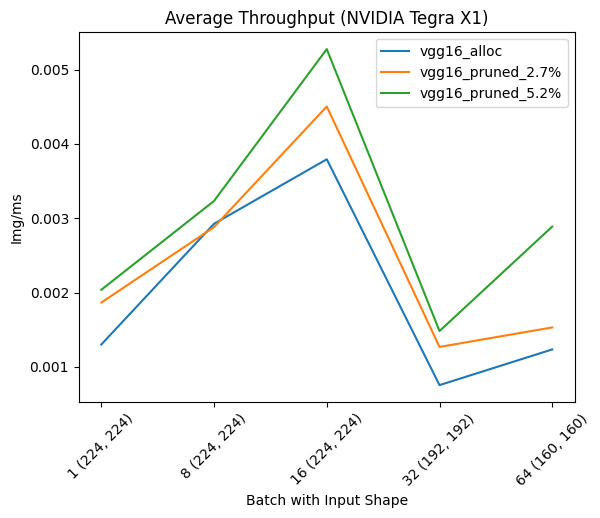

In [31]:
dev_name = data['device_name'].unique().item()

unpruned_data = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}.pt']
pruned_data_1 = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}_pruned_027.pt']
pruned_data_2 = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}_pruned_052.pt']


# batch_input_size = list(set(data['batch_size'].astype(str) + ' ' + data['input_shape'].astype(str)))

plt.plot(batch_input_size, unpruned_data['batch_size']/(unpruned_data['inference_time'] + unpruned_data['transform_time']), 
         label=f'{prefix}_alloc')
plt.plot(batch_input_size, pruned_data_1['batch_size']/(pruned_data_1['inference_time'] + pruned_data_1['transform_time']), 
         label=f'{prefix}_pruned_2.7%')
plt.plot(batch_input_size, pruned_data_2['batch_size']/(pruned_data_2['inference_time'] + pruned_data_2['transform_time']), 
         label=f'{prefix}_pruned_5.2%')

# Adding labels and title
plt.xlabel('Batch with Input Shape')
plt.ylabel('Img/ms')
plt.title(f'Average Throughput ({dev_name})')

# Adding legend
plt.legend()
plt.xticks(rotation=45) 
# Display plot
plt.show()

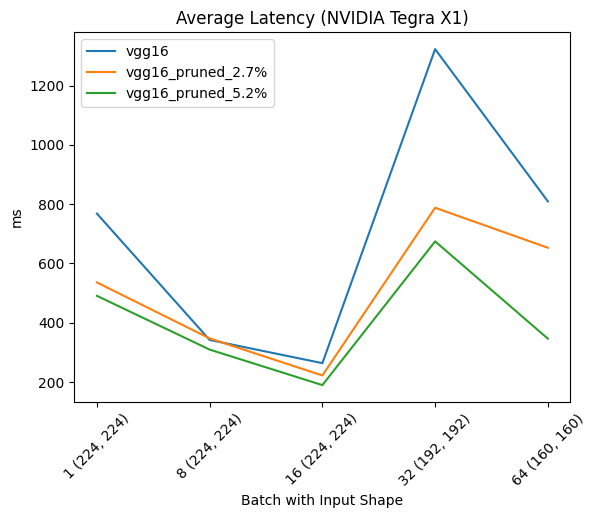

In [32]:
dev_name = data['device_name'].unique().item()

unpruned_data = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}.pt']
pruned_data_1 = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}_pruned_027.pt']
pruned_data_2 = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}_pruned_052.pt']


# batch_input_size = list(set(data['batch_size'].astype(str) + ' ' + data['input_shape'].astype(str)))

plt.plot(batch_input_size, (unpruned_data['inference_time'] + unpruned_data['transform_time'])/unpruned_data['batch_size'], 
         label=f'{prefix}')
plt.plot(batch_input_size, (pruned_data_1['inference_time'] + pruned_data_1['transform_time'])/pruned_data_1['batch_size'], 
         label=f'{prefix}_pruned_2.7%')
plt.plot(batch_input_size, (pruned_data_2['inference_time'] + pruned_data_2['transform_time'])/pruned_data_2['batch_size'], 
         label=f'{prefix}_pruned_5.2%')

# Adding labels and title
plt.xlabel('Batch with Input Shape')
plt.ylabel('ms')
plt.title(f'Average Latency ({dev_name})')

# Adding legend
plt.legend()
plt.xticks(rotation=45) 
# Display plot
plt.show()

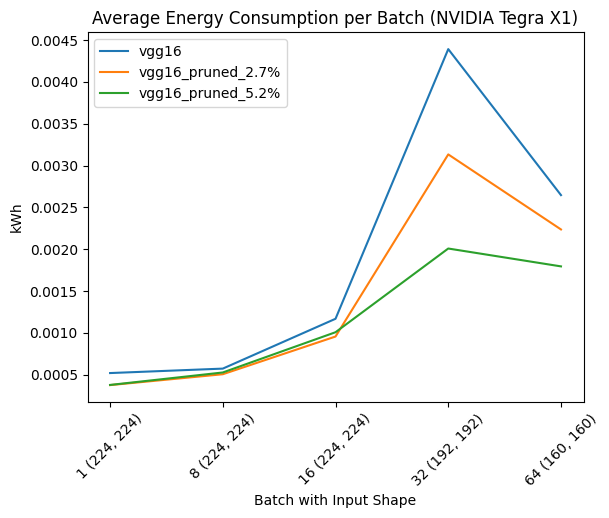

In [7]:
dev_name = data['device_name'].unique().item()

unpruned_data = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}.pt']
pruned_data_1 = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}_pruned_027.pt']
pruned_data_2 = data[data['model'] == f'/FYP/Edge_Profiler/models/{prefix}_pruned_052.pt']


# batch_input_size = list(set(data['batch_size'].astype(str) + ' ' + data['input_shape'].astype(str)))

plt.plot(batch_input_size, unpruned_data['energy'], 
         label=f'{prefix}')
plt.plot(batch_input_size, pruned_data_1['energy'], 
         label=f'{prefix}_pruned_2.7%')
plt.plot(batch_input_size, pruned_data_2['energy'], 
         label=f'{prefix}_pruned_5.2%')


# Adding labels and title
plt.xlabel('Batch with Input Shape')
plt.ylabel('kWh')
plt.title(f'Average Energy Consumption per Batch ({dev_name})')

plt.xticks(rotation=45) 


# Adding legend
plt.legend()
plt.xticks(rotation=45) 
# Display plot
plt.show()